In [1]:
from collections import Counter
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/Dataset/brain stroke/'

In [3]:
df = pd.read_csv(f'{DATA_PATH}/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
le_1                 = LabelEncoder()
df['gender']         = le_1.fit_transform(df['gender'])
df['ever_married']   = le_1.fit_transform(df['ever_married'])
df['work_type']      = le_1.fit_transform(df['work_type'])
df['Residence_type'] = le_1.fit_transform(df['Residence_type'])
df['smoking_status'] = le_1.fit_transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


<AxesSubplot: >

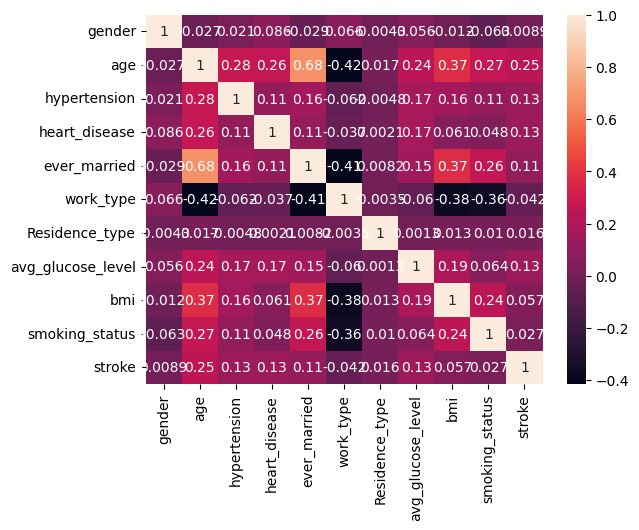

In [6]:
sns.heatmap(data = df.corr(), annot = True)

In [7]:
df = df[['age'              , 'hypertension',  'heart_disease', 'work_type', 
         'avg_glucose_level',          'bmi', 'smoking_status',    'stroke']]

<AxesSubplot: xlabel='age', ylabel='Count'>

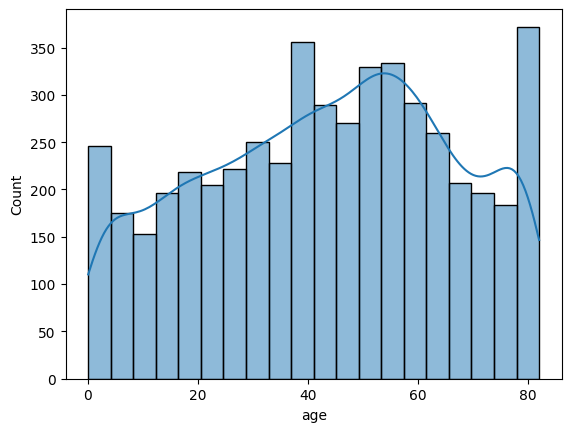

In [8]:
sns.histplot(data = df['age'], kde = True)

<AxesSubplot: xlabel='bmi', ylabel='Count'>

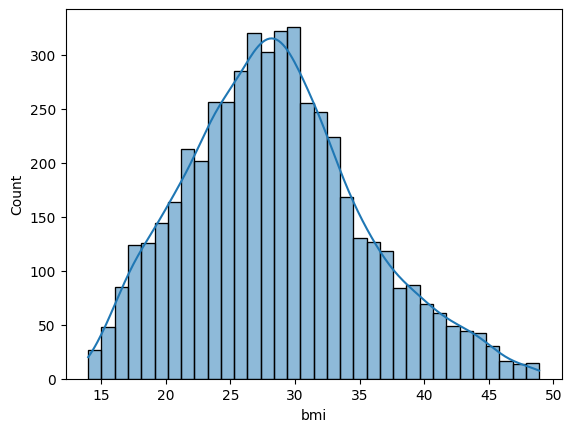

In [9]:
sns.histplot(data = df.bmi, kde = True)

<AxesSubplot: xlabel='avg_glucose_level', ylabel='Count'>

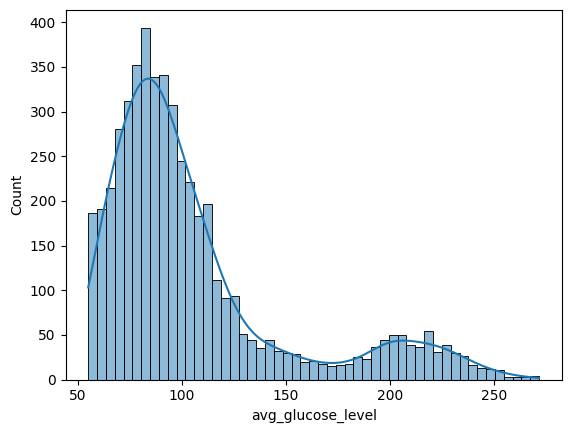

In [10]:
sns.histplot(data = df.avg_glucose_level, kde = True)

In [11]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [12]:
x = df.iloc[:, :-1].values
y = df.iloc[:,  -1].values

In [13]:
smote          = SMOTE()
x_data, y_data = smote.fit_resample(x, y)

print(Counter(y_data))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, 
                                                    random_state = 99)

sc      = StandardScaler()
x_train = sc.fit_transform(x_train)

Counter({1: 4733, 0: 4733})


In [14]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred   = logistic.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100:.3f} %')

Accuracy : 50.282 %


In [15]:
rfc      = RandomForestClassifier(n_estimators = 10, random_state = 99)
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100:.3f} %')

Accuracy : 50.282 %


In [16]:
bagging  = BaggingClassifier(base_estimator = rfc, n_estimators = 50)
bagging.fit(x_train, y_train)

bag_pred = bagging.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100:.3f} %') 

Accuracy : 50.282 %


In [17]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 99)

for train_data, test_data in kf.split(x_data):
    
    x_train, x_test = x_data[train_data], x_data[test_data]
    y_train, y_test = y_data[train_data], y_data[test_data]
    
    scores = cross_val_score(bagging, x_train, y_train, cv = kf)
    print(scores)
    print(f'mean score : {np.mean(scores) * 100:.2f} %')
    print(f'Y data Counter : {Counter(y_test)}\n\n')

[0.95709571 0.95775578 0.9682959  0.96036988 0.95706737]
mean score : 96.01 %
Y data Counter : Counter({1: 947, 0: 947})


[0.95511551 0.95445545 0.95775578 0.9676354  0.9663144 ]
mean score : 96.03 %
Y data Counter : Counter({1: 961, 0: 932})


[0.95775578 0.95577558 0.9709571  0.9676354  0.96103038]
mean score : 96.26 %
Y data Counter : Counter({0: 957, 1: 936})


[0.94719472 0.95115512 0.96369637 0.97027741 0.95904888]
mean score : 95.83 %
Y data Counter : Counter({1: 964, 0: 929})


[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %
Y data Counter : Counter({0: 968, 1: 925})




In [20]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 33)
skf.get_n_splits(x_data, y_data)

for train_data, test_data in skf.split(x_data, y_data):
    
    x_train, x_test = x_data[train_data], x_data[test_data]
    y_train, y_test = y_data[train_data], y_data[test_data]
    
    print(f'train y Balancing : {Counter(y_train)}')
    print(f'test  y Balancing : {Counter(y_test)}')
    print(scores)
    print(f'mean score : {np.mean(scores) * 100:.2f} %\n\n')

train y Balancing : Counter({1: 3786, 0: 3786})
test  y Balancing : Counter({1: 947, 0: 947})
[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %


train y Balancing : Counter({0: 3787, 1: 3786})
test  y Balancing : Counter({1: 947, 0: 946})
[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %


train y Balancing : Counter({0: 3787, 1: 3786})
test  y Balancing : Counter({1: 947, 0: 946})
[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %


train y Balancing : Counter({1: 3787, 0: 3786})
test  y Balancing : Counter({0: 947, 1: 946})
[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %


train y Balancing : Counter({1: 3787, 0: 3786})
test  y Balancing : Counter({0: 947, 1: 946})
[0.95709571 0.96039604 0.95643564 0.9669749  0.95574637]
mean score : 95.93 %


